#Library

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Load Dataset

In [2]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel ke dalam rentang 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 [==============================] - 4s 0us/step


#One Hot Encoding

In [3]:
# One-hot encoding untuk label
train_labelsA = to_categorical(train_labels)
test_labelsA = to_categorical(test_labels)


#Model CNN

In [4]:
# Membuat model CNN menggunakan Sequential API
model = models.Sequential()

# Menambahkan layer konvolusi pertama dengan 32 filter ukuran 3x3 dan aktivasi ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Menambahkan layer MaxPooling dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer konvolusi kedua dengan 64 filter ukuran 3x3 dan aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer MaxPooling kedua dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer konvolusi ketiga dengan 64 filter ukuran 3x3 dan aktivasi ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten output dari layer sebelumnya untuk dihubungkan ke fully connected layer
model.add(layers.Flatten())

# Menambahkan fully connected layer dengan 64 unit dan aktivasi ReLU
model.add(layers.Dense(64, activation='relu'))

# Menambahkan output layer dengan 10 unit (jumlah kelas di CIFAR-10) dan aktivasi softmax
model.add(layers.Dense(10, activation='softmax'))

#Training Model

In [5]:
# Compile model dengan optimizer Adam dan loss categorical crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data training, menggunakan batch size 200, dan validasi dengan data test
history = model.fit(train_images, train_labelsA, epochs=20, batch_size=200, validation_data=(test_images, test_labelsA))


Epoch 1/20
250/250 [==============================] - 60s 234ms/step - loss: 1.7016 - accuracy: 0.3779 - val_loss: 1.4240 - val_accuracy: 0.4857
Epoch 2/20
250/250 [==============================] - 56s 225ms/step - loss: 1.3586 - accuracy: 0.5131 - val_loss: 1.2792 - val_accuracy: 0.5438
Epoch 3/20
250/250 [==============================] - 57s 227ms/step - loss: 1.2171 - accuracy: 0.5671 - val_loss: 1.1660 - val_accuracy: 0.5823
Epoch 4/20
250/250 [==============================] - 58s 232ms/step - loss: 1.1108 - accuracy: 0.6085 - val_loss: 1.1114 - val_accuracy: 0.6117
Epoch 5/20
250/250 [==============================] - 63s 251ms/step - loss: 1.0369 - accuracy: 0.6347 - val_loss: 1.0084 - val_accuracy: 0.6463
Epoch 6/20
250/250 [==============================] - 57s 230ms/step - loss: 0.9784 - accuracy: 0.6568 - val_loss: 0.9740 - val_accuracy: 0.6602
Epoch 7/20
250/250 [==============================] - 64s 255ms/step - loss: 0.9160 - accuracy: 0.6799 - val_loss: 0.9380 - val_ac

In [15]:
# Membuat prediksi dengan model pada data test
y_predict = model.predict(test_images)

# Menampilkan prediksi untuk gambar test pertama yang diprediksi
np.round(y_predict[15])

313/313 [==============================] - 6s 18ms/step


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

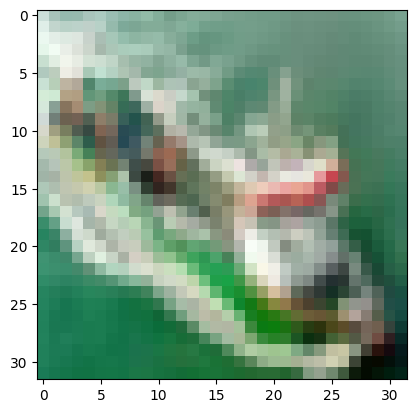

In [16]:
# Menampilkan gambar test pertama
plt.imshow(test_images[15])
# plt.show()